In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
search_result = lk.search_lightcurve('TIC 903266526')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,20,903266526,0.0
3,TESS Sector 72,2023,SPOC,120,903266526,0.0
4,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
5,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0


In [3]:
# lc = search_result[1].download(download_dir='data/') 

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

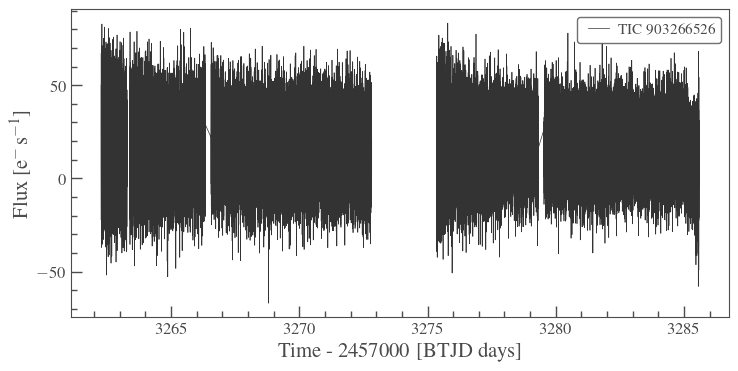

In [4]:
# lc.plot()

In [14]:
# lcn=lc.normalize()
# lcn= lc.flatten(1001)
# lcn.flux = lcn.flux.value -1
# lcn.flux = lcn.flux*100
# lcn.flux_err = lcn.flux_err.value*100

# lcn.scatter()

In [15]:
# pg = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
# # pg = lcn.to_periodogram(method='bls')
# plt.plot(pg.period.to(u.h), pg.power)
# period = pg.period_at_max_power
# print(pg.period_at_max_power.to(u.h))
# plt.xscale('log')
# plt.axvline(4.22, c='C1')

In [16]:
# lcf = lcn.fold(2*4.23*u.h).bin(6*u.min)
# lcf.errorbar()

In [17]:
# tpf_search = lk.search_targetpixelfile('TIC 903266526')

In [18]:
# tpf_search

In [19]:
# tpf = tpf_search[0].download(download_dir='data/') 

In [20]:
# tpf.plot();

In [21]:
# tpf.interact();

In [22]:
# 4.23/24

0.17625000000000002

In [23]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,20,903266526,0.0
3,TESS Sector 72,2023,SPOC,120,903266526,0.0
4,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
5,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0


In [26]:
lc_120s = search_result[search_result.exptime==120*u.s]
lc_120s

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,SPOC,120,903266526,0.0
1,TESS Sector 46,2021,SPOC,120,903266526,0.0
2,TESS Sector 72,2023,SPOC,120,903266526,0.0


In [44]:
lc_600s = search_result[search_result.exptime==600*u.s]
lc_600s

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 45,2021,TESS-SPOC,600,903266526,0.0
1,TESS Sector 46,2021,TESS-SPOC,600,903266526,0.0


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


0.0034752528426940043 d


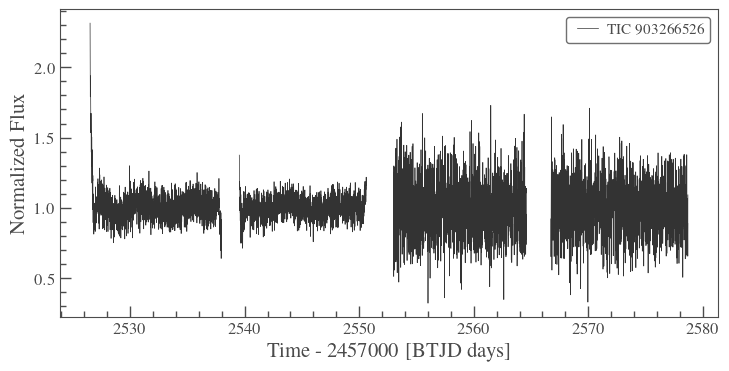

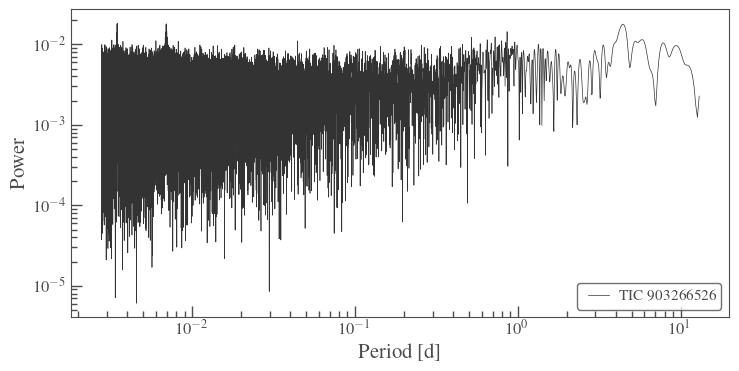

In [45]:
for i, sr in enumerate(lc_600s):
    lci  = sr.download(download_dir='data/')
    # lci.plot()
    # lcn=lc.normalize()
    lcn= lci.flatten(1001)
    # lcn.flux = lcn.flux -1
    # lcn.flux = lcn.flux*100
    # lcn.flux_err = lcn.flux_err.value*100
    
    # lcn.scatter()
    pgi = lcn.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
    # pgi.plot(scale='log')
    if i == 0:
        lc = lcn
    else:
        lc = lc.append(lcn)
lc.plot()
pg = lc.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
pg.plot(scale='log')
print(pg.period_at_max_power)